In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

/home/pongpop/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('../data/data.csv')
df.head()

,Province/State,City/County/Borough/Region,Date,Total Death,Total Confirmed,Death Rate
0,Alabama,Choctaw,2022-08-20,37,2155,0.017169
1,Alabama,Perry,2022-08-20,47,2366,0.019865
2,Alabama,Wilcox,2022-08-19,48,3299,0.014550
3,Alabama,Greene,2022-08-19,51,2079,0.024531
4,Alabama,Sumter,2022-08-20,52,2882,0.018043


In [3]:
state_df = df.groupby(df['Province/State']).sum().reset_index()
state_df

/tmp/ipykernel_649/3775815474.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_df = df.groupby(df['Province/State']).sum().reset_index()


,Province/State,Total Death,Total Confirmed,Death Rate
0,Alabama,20041,1463933,1.102538
1,Alaska,1331,289052,0.111015
2,Arizona,30982,2237208,0.261312
3,Arkansas,11864,891979,1.242037
4,California,94486,10953003,0.469453
5,Colorado,13114,1616536,0.768124
6,Connecticut,11179,866003,0.100164
7,Delaware,3039,299187,0.032853
8,District of Columbia,1376,165055,0.008337
9,Florida,78049,6976783,1.006101


In [4]:
state_df.drop(columns=['Total Confirmed', 'Death Rate'], inplace=True)
state_df.head()

,Province/State,Total Death
0,Alabama,20041
1,Alaska,1331
2,Arizona,30982
3,Arkansas,11864
4,California,94486


In [5]:
state_df = state_df.sort_values(by='Total Death', ascending=False)
state_df

,Province/State,Total Death
4,California,94486
44,Texas,89964
9,Florida,78049
32,New York,70350
38,Pennsylvania,46514
35,Ohio,39305
10,Georgia,37934
22,Michigan,37737
30,New Jersey,34793
13,Illinois,34598


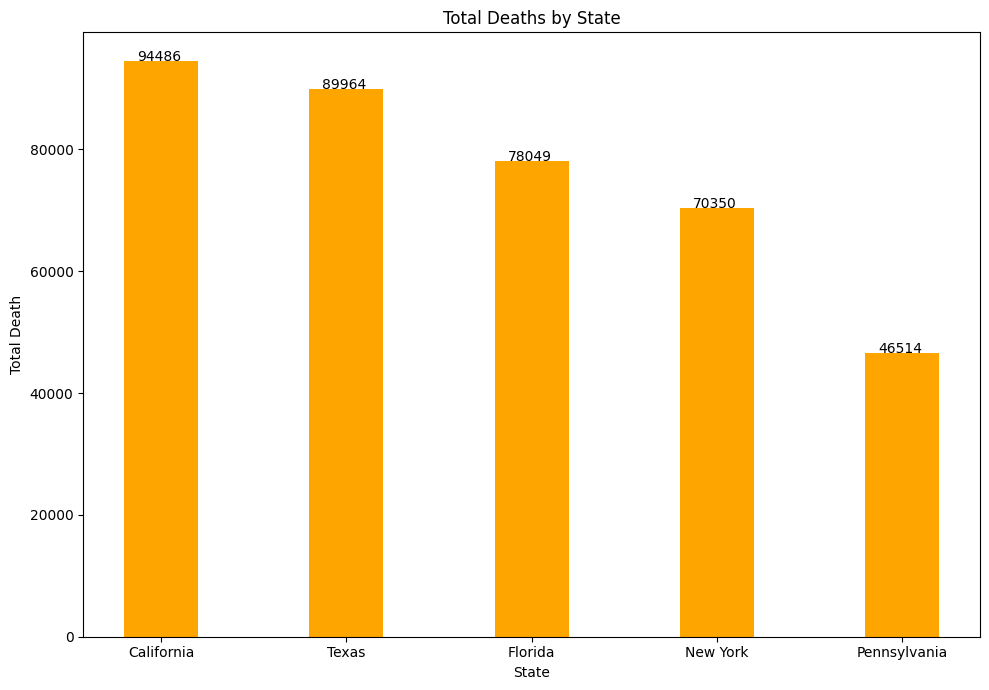

In [6]:
state_df = state_df[:5]
plt.figure(figsize=(10, 7))
plt.bar(state_df['Province/State'], state_df['Total Death'], width = 0.4, color='orange')
plt.xlabel('State')
plt.ylabel('Total Death')
plt.title('Total Deaths by State')
plt.xticks(rotation=0)
for bar in plt.bar(state_df['Province/State'], state_df['Total Death'], width = 0.4, color='orange'):
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=10)
plt.tight_layout()

plt.savefig('total_deaths_by_state.png')

# wait till the image is saved before showing it
#Image(filename='total_deaths_by_state.png')

In [7]:
# remove the image file
import os
os.remove('total_deaths_by_state.png')